<a href="https://colab.research.google.com/github/peterphoenix/School-Projects/blob/master/Machine_Learning_Session_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sb
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [ ]:
fuelData =pd.read_csv("/content/drive/My Drive/Colab Notebooks/FuelConsumptionCo2.csv")
print(fuelData.dtypes)
print(fuelData.isna().values.any())

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object
False


   CYLINDERS  ENGINESIZE  ...  FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB_MPG
0          4         2.0  ...                  6.7                        33
1          4         2.4  ...                  7.7                        29
2          4         1.5  ...                  5.8                        48
3          6         3.5  ...                  9.1                        25
4          6         3.5  ...                  8.7                        27

[5 rows x 7 columns]


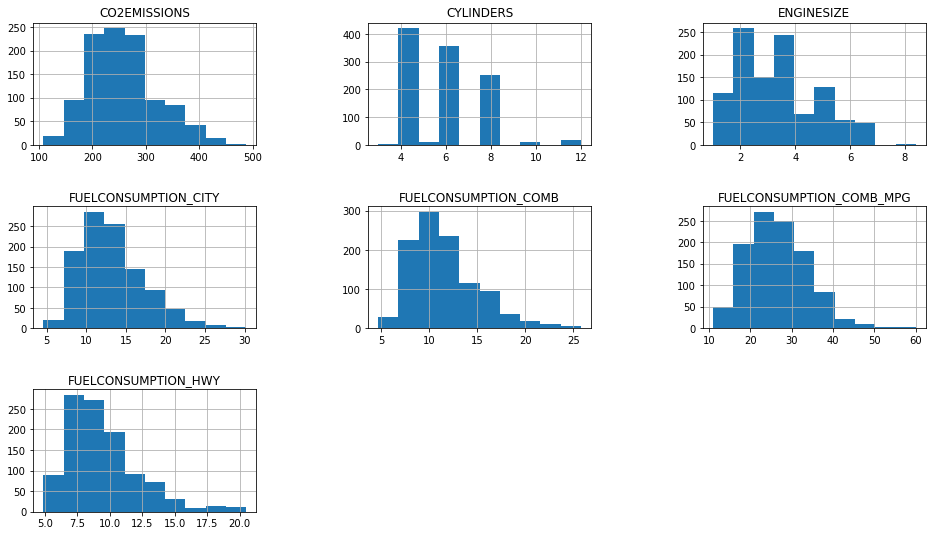

In [ ]:
newFuelData = fuelData[["CYLINDERS", "ENGINESIZE", "CO2EMISSIONS", "FUELCONSUMPTION_COMB", 
                        "FUELCONSUMPTION_CITY", "FUELCONSUMPTION_HWY", "FUELCONSUMPTION_COMB_MPG"]]
print(newFuelData.head())
newFuelData.hist()
plt.subplots_adjust(hspace = 0.5, wspace = 0.5) #adjust space
plt.rcParams["figure.figsize"] = [16,9] #adjust figure size
plt.show() #di colab gausa di show tapi codenya di show

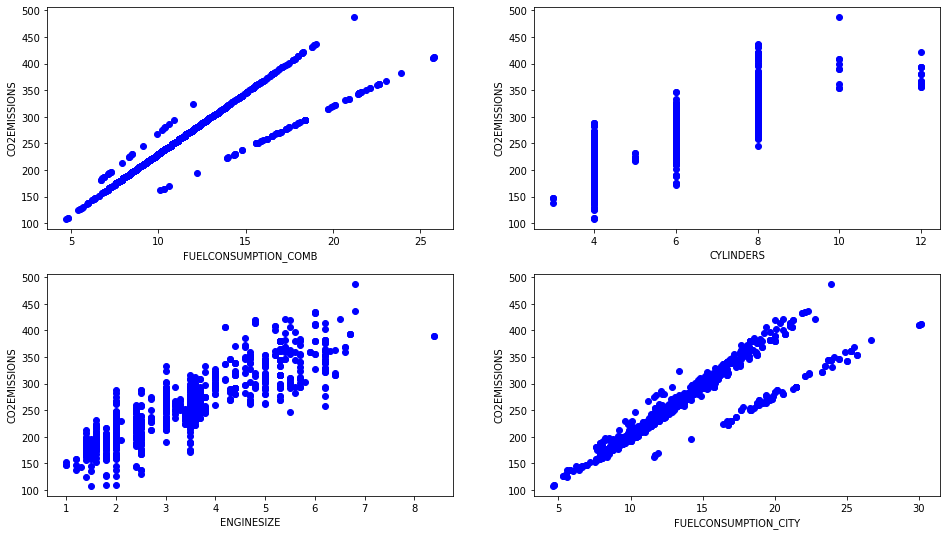

In [ ]:
#2 2 1 -> size 2*2 lokasi 1 (kiri atas), lokasi 2 (kanan atas), dst
plt.subplot(221)
plt.scatter(newFuelData["FUELCONSUMPTION_COMB"], newFuelData["CO2EMISSIONS"], color = "blue")
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2EMISSIONS")

plt.subplot(222)
plt.scatter(newFuelData["CYLINDERS"], newFuelData["CO2EMISSIONS"], color = "blue")
plt.xlabel("CYLINDERS")
plt.ylabel("CO2EMISSIONS")

plt.subplot(223)
plt.scatter(newFuelData["ENGINESIZE"], newFuelData["CO2EMISSIONS"], color = "blue")
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")

plt.subplot(224)
plt.scatter(newFuelData["FUELCONSUMPTION_CITY"], newFuelData["CO2EMISSIONS"], color = "blue")
plt.xlabel("FUELCONSUMPTION_CITY")
plt.ylabel("CO2EMISSIONS")

plt.show()


In [ ]:
train, test = train_test_split(newFuelData, test_size = 0.2)
#train = 80% newFuelData, test = 20% NFD
print(len(newFuelData), newFuelData.size) #len jumlah row, size jumlah cell
print(len(train), train.size)
print(len(test), test.size)
regression = linear_model.LinearRegression()
regression.fit(train[["ENGINESIZE"]], train[["CO2EMISSIONS"]])
print("Coefficients: ", regression.coef_)
print("Intercept: ", regression.intercept_)


1067 7469
853 5971
214 1498
Coefficients:  [[39.29972831]]
Intercept:  [124.66166368]


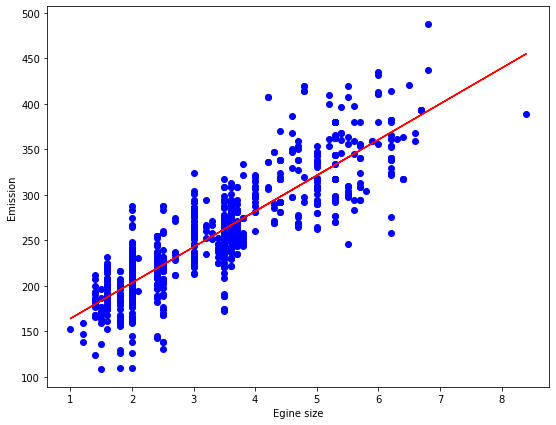

In [ ]:
plt.scatter(train["ENGINESIZE"], train["CO2EMISSIONS"], color = "blue")
a = regression.coef_
b = regression.intercept_ #intercept = konstanta(gada variable)
X = train[["ENGINESIZE"]] #X = input (dari train[["ENGINESIZE"]])
Y = a * X + b
plt.plot(X, Y, "-r")
plt.xlabel("Egine size")
plt.ylabel("Emission")
plt.rcParams["figure.figsize"] = [9,7]
plt.show()


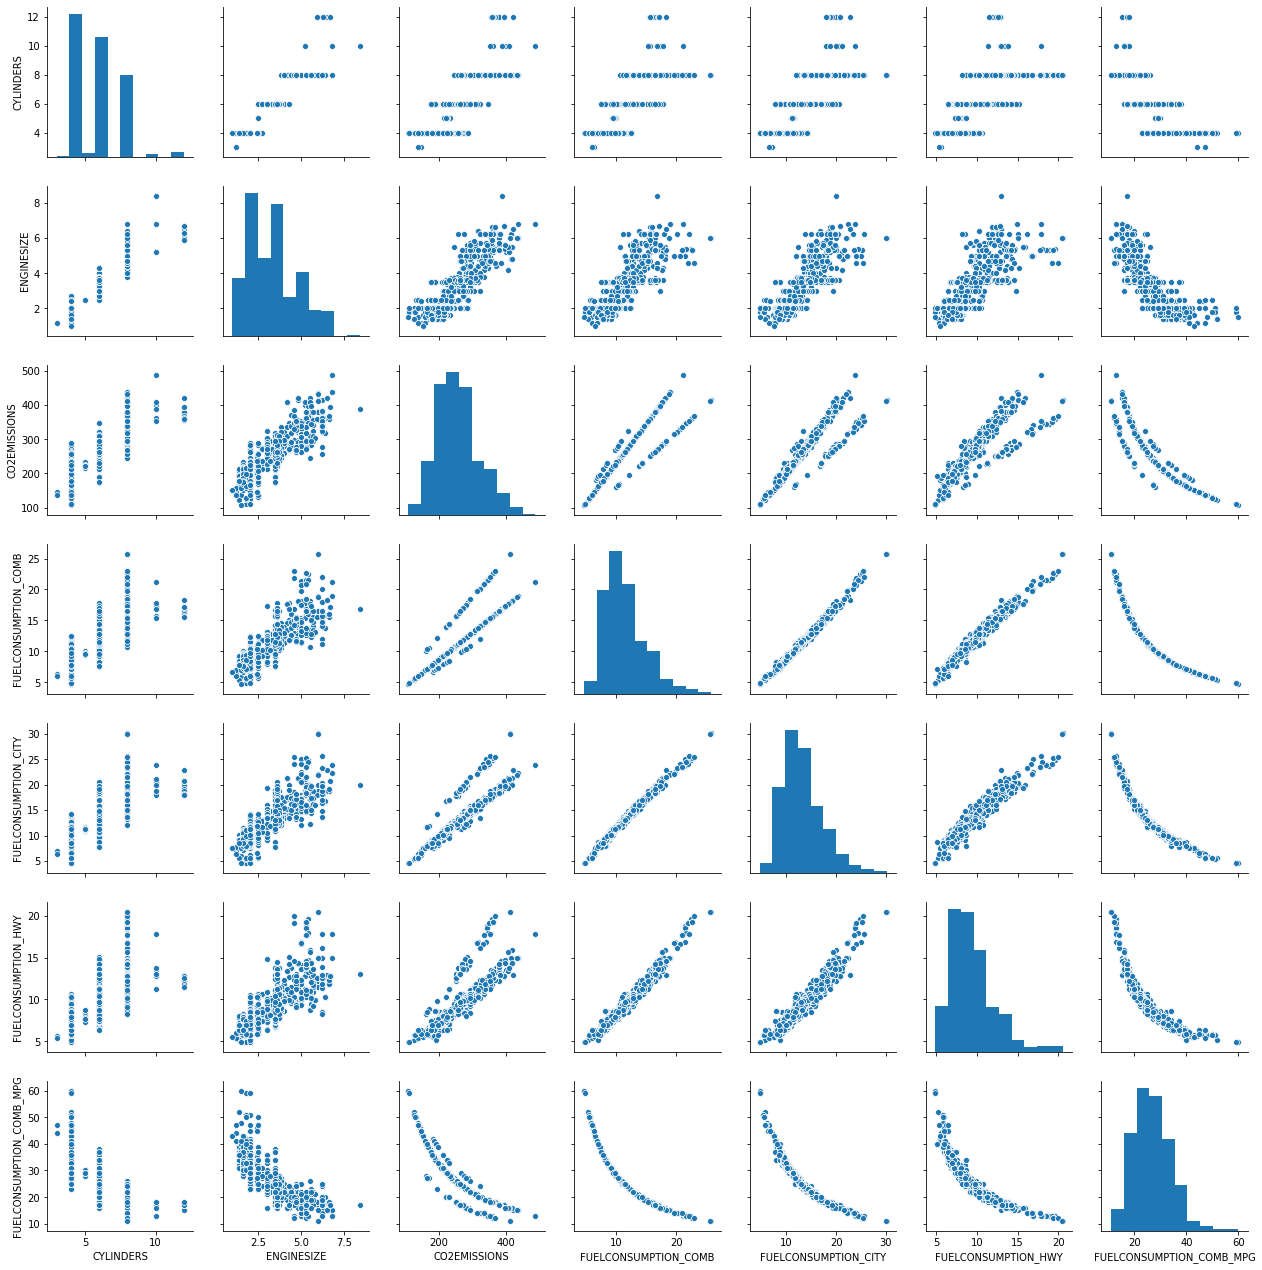

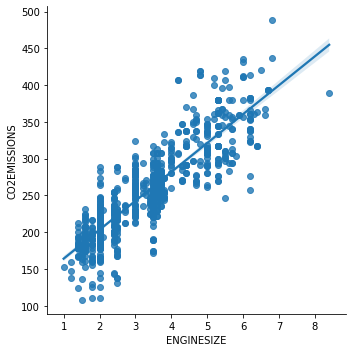

In [ ]:
#using seaborn
sb.pairplot(train) #yg kotak kotak banyak
sb.lmplot("ENGINESIZE", "CO2EMISSIONS", data = train) #linear model plot (yang paling bawah)
plt.show()

In [ ]:
#predict new data
prediction = regression.predict(test[["ENGINESIZE"]])
for i in range(len(test)) :
  print(test[["ENGINESIZE"]].values[i], prediction[i], test[["CO2EMISSIONS"]].values[i])
  #prediction tuh hasil yg test.values[i] tuh kunci jawaban

print("MAE : ", mean_absolute_error(test[["CO2EMISSIONS"]], prediction)) #rata rata selisih
print("MSE : ", mean_squared_error(test[["CO2EMISSIONS"]], prediction)) #rata rata selisih kuadrat
print("R2 : ", r2_score(test[["CO2EMISSIONS"]], prediction)) #representasi benernya berapa persen


[3.] [242.56084862] [232]
[5.3] [332.95022374] [317]
[1.6] [187.54122898] [200]
[5.] [321.16030524] [343]
[1.6] [187.54122898] [191]
[1.6] [187.54122898] [191]
[5.2] [329.02025091] [409]
[5.9] [356.53006073] [359]
[4.7] [309.37038675] [347]
[1.6] [187.54122898] [179]
[2.] [203.26112031] [200]
[2.] [203.26112031] [200]
[1.4] [179.68128332] [191]
[5.] [321.16030524] [306]
[2.] [203.26112031] [198]
[6.] [360.46003356] [327]
[5.] [321.16030524] [306]
[1.6] [187.54122898] [196]
[6.2] [368.31997922] [340]
[6.2] [368.31997922] [329]
[3.5] [262.21071278] [239]
[3.5] [262.21071278] [239]
[4.6] [305.44041392] [373]
[3.6] [266.14068561] [269]
[1.4] [179.68128332] [163]
[3.5] [262.21071278] [271]
[1.6] [187.54122898] [175]
[2.5] [222.91098446] [239]
[8.4] [454.77938151] [389]
[5.4] [336.88019657] [346]
[3.5] [262.21071278] [294]
[2.] [203.26112031] [209]
[2.4] [218.98101163] [230]
[3.4] [258.28073994] [232]
[3.] [242.56084862] [281]
[2.5] [222.91098446] [198]
[6.6] [384.03987054] [368]
[2.4] [218.